Ridership columns: ['_id', 'route', 'ridership_route_code', 'route_full_name', 'current_garage', 'mode', 'month_start', 'year_month', 'day_type', 'avg_riders', 'day_count']


请输入线路编号（如 61A），或输入 'All' 查看系统总客流：  all


🔵 显示系统层面总客流量图...


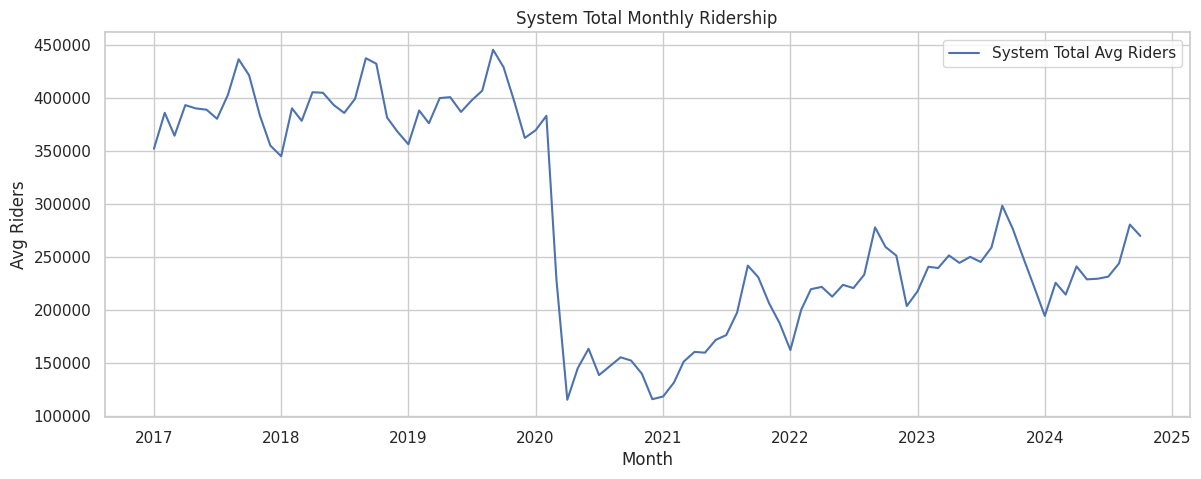

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. 读取数据
# -----------------------------
ridership = pd.read_csv("/kaggle/input/prtdata/monthly_ridership.csv")
trips = pd.read_csv("/kaggle/input/prtdata/schedule_trip_counts.csv")   # 目前暂时不使用 trips，只保留 ridership 层面图

print("Ridership columns:", list(ridership.columns))


# -----------------------------
# 2. 清洗和构造 year_month（Ridership 已有 year_month）
# -----------------------------
# ridership['year_month'] 本身就是 YYYYMM，可以直接使用，不需要拆分

# 把 year_month 转换成可排序的日期
ridership["year_month"] = ridership["year_month"].astype(str)

# 删除无效 year_month
bad_rows = ridership[ridership["year_month"].str.len() != 6]
if len(bad_rows) > 0:
    print("⚠ 以下是无效的 year_month，将自动删除：")
    print(bad_rows[["year_month"]])
    ridership = ridership[ridership["year_month"].str.len() == 6]

# 转换为 datetime（便于排序）
ridership["date"] = pd.to_datetime(ridership["year_month"], format="%Y%m")


# -----------------------------
# 3. 构造用户查询功能
# -----------------------------

def plot_system_total_ridership():
    """系统层面：所有线路合计客流量"""
    df_sys = (
        ridership.groupby("date")["avg_riders"]
        .sum()
        .reset_index()
        .sort_values("date")
    )

    plt.figure(figsize=(14, 5))
    plt.plot(df_sys["date"], df_sys["avg_riders"], label="System Total Avg Riders")
    plt.title("System Total Monthly Ridership")
    plt.xlabel("Month")
    plt.ylabel("Avg Riders")
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_single_route(route_search):
    """单线路客流图：允许用户输入 route 或 route_full_name"""
    # 允许按 route 数字或字符串查
    df = ridership[
        (ridership["route"].astype(str) == str(route_search)) |
        (ridership["route_full_name"].str.contains(str(route_search), case=False, na=False))
    ]

    if df.empty:
        print(f"❌ 查无此线路：{route_search}")
        return

    df = df.sort_values("date")

    plt.figure(figsize=(14, 5))
    plt.plot(df["date"], df["avg_riders"], label=f"Route {route_search} Avg Riders")
    plt.title(f"Monthly Ridership: Route {route_search}")
    plt.xlabel("Month")
    plt.ylabel("Avg Riders")
    plt.grid(True)
    plt.legend()
    plt.show()


def query_route():
    """总查询入口"""
    user_input = input("请输入线路编号（如 61A），或输入 'All' 查看系统总客流： ")

    if user_input.lower() == "all":
        print("🔵 显示系统层面总客流量图...")
        plot_system_total_ridership()
    else:
        print(f"🟢 显示线路 {user_input} 的月均客流图...")
        plot_single_route(user_input)


# -----------------------------
# 4. 启动交互
# -----------------------------
query_route()
